<a href="https://colab.research.google.com/github/Ahmed23Adel/House-prices-kaggle-competition/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libs


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import plotly.express as px

# importing data

In [ ]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
all_data=pd.concat((train.drop(['SalePrice'], axis=1), test))
train.sample()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
602,603,60,RL,80.0,10041,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,789,Unf,0,119,908,GasA,...,Y,SBrkr,927,988,0,1915,1,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1992.0,Fin,2,506,TA,TA,Y,120,150,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,220000


# Data wrangling 3.0


### Filling missing values 3.1


In [ ]:
all_data['GarageType']=all_data['GarageType'].astype("category")
all_data['GarageType']=all_data['GarageType'].cat.add_categories(['MISSING'])
all_data['GarageType']=all_data['GarageType'].fillna('MISSING')

all_data['GarageFinish']=all_data['GarageFinish'].astype("category")
all_data['GarageFinish']=all_data['GarageFinish'].cat.add_categories(['MISSING'])
all_data['GarageFinish']=all_data['GarageFinish'].fillna('MISSING')

all_data['GarageQual']=all_data['GarageQual'].astype("category")
all_data['GarageQual']=all_data['GarageQual'].cat.add_categories(['MISSING'])
all_data['GarageQual']=all_data['GarageQual'].fillna('MISSING')

all_data['GarageCond']=all_data['GarageCond'].astype("category")
all_data['GarageCond']=all_data['GarageCond'].cat.add_categories(['MISSING'])
all_data['GarageCond']=all_data['GarageCond'].fillna('MISSING')

all_data['PoolQC']=all_data['PoolQC'].astype("category")
all_data['PoolQC']=all_data['PoolQC'].cat.add_categories(['MISSING'])
all_data['PoolQC']=all_data['PoolQC'].fillna('MISSING')

all_data['Fence']=all_data['Fence'].astype("category")
all_data['Fence']=all_data['Fence'].cat.add_categories(['MISSING'])
all_data['Fence']=all_data['Fence'].fillna('MISSING')

all_data['MiscFeature']=all_data['MiscFeature'].astype("category")
all_data['MiscFeature']=all_data['MiscFeature'].cat.add_categories(['MISSING'])
all_data['MiscFeature']=all_data['MiscFeature'].fillna('MISSING')

all_data['Alley']=all_data['Alley'].astype("category")
all_data['Alley']=all_data['Alley'].cat.add_categories(['MISSING'])
all_data['Alley']=all_data['Alley'].fillna('MISSING')

all_data['BsmtQual']=all_data['BsmtQual'].astype("category")
all_data['BsmtQual']=all_data['BsmtQual'].cat.add_categories(['MISSING'])
all_data['BsmtQual']=all_data['BsmtQual'].fillna('MISSING')

all_data['BsmtCond']=all_data['BsmtCond'].astype("category")
all_data['BsmtCond']=all_data['BsmtCond'].cat.add_categories(['MISSING'])
all_data['BsmtCond']=all_data['BsmtCond'].fillna('MISSING')

all_data['BsmtExposure']=all_data['BsmtExposure'].astype("category")
all_data['BsmtExposure']=all_data['BsmtExposure'].cat.add_categories(['MISSING'])
all_data['BsmtExposure']=all_data['BsmtExposure'].fillna('MISSING')

all_data['BsmtFinType1']=all_data['BsmtFinType1'].astype("category")
all_data['BsmtFinType1']=all_data['BsmtFinType1'].cat.add_categories(['MISSING'])
all_data['BsmtFinType1']=all_data['BsmtFinType1'].fillna('MISSING')

all_data['BsmtFinType2']=all_data['BsmtFinType2'].astype("category")
all_data['BsmtFinType2']=all_data['BsmtFinType2'].cat.add_categories(['MISSING'])
all_data['BsmtFinType2']=all_data['BsmtFinType2'].fillna('MISSING')

all_data['FireplaceQu']=all_data['FireplaceQu'].astype("category")
all_data['FireplaceQu']=all_data['FireplaceQu'].cat.add_categories(['MISSING'])
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('MISSING')

all_data['MasVnrType']=all_data['MasVnrType'].astype("category")
all_data['MasVnrType']=all_data['MasVnrType'].cat.add_categories(['MISSING'])
all_data['MasVnrType']=all_data['MasVnrType'].fillna('MISSING')



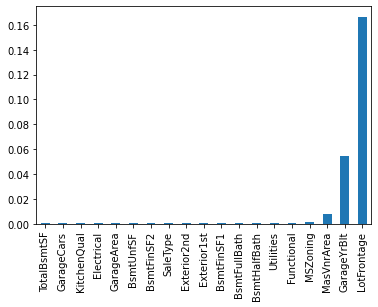

In [ ]:
missing=all_data.isnull().sum()
missing=missing[missing>0.0]/len(all_data)
missing.sort_values(ascending=True, inplace=True)
missing.plot.bar()

For columns having nearly 1 missing values, i will filling it randomly

In [ ]:
train[missing.index].skew() # if skewed i will use median, if not skewed i will use mean

TotalBsmtSF     1.524255
GarageCars     -0.342549
GarageArea      0.179981
BsmtUnfSF       0.920268
BsmtFinSF2      4.255261
BsmtFinSF1      1.685503
BsmtFullBath    0.596067
BsmtHalfBath    4.103403
MasVnrArea      2.669084
GarageYrBlt    -0.649415
LotFrontage     2.163569
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



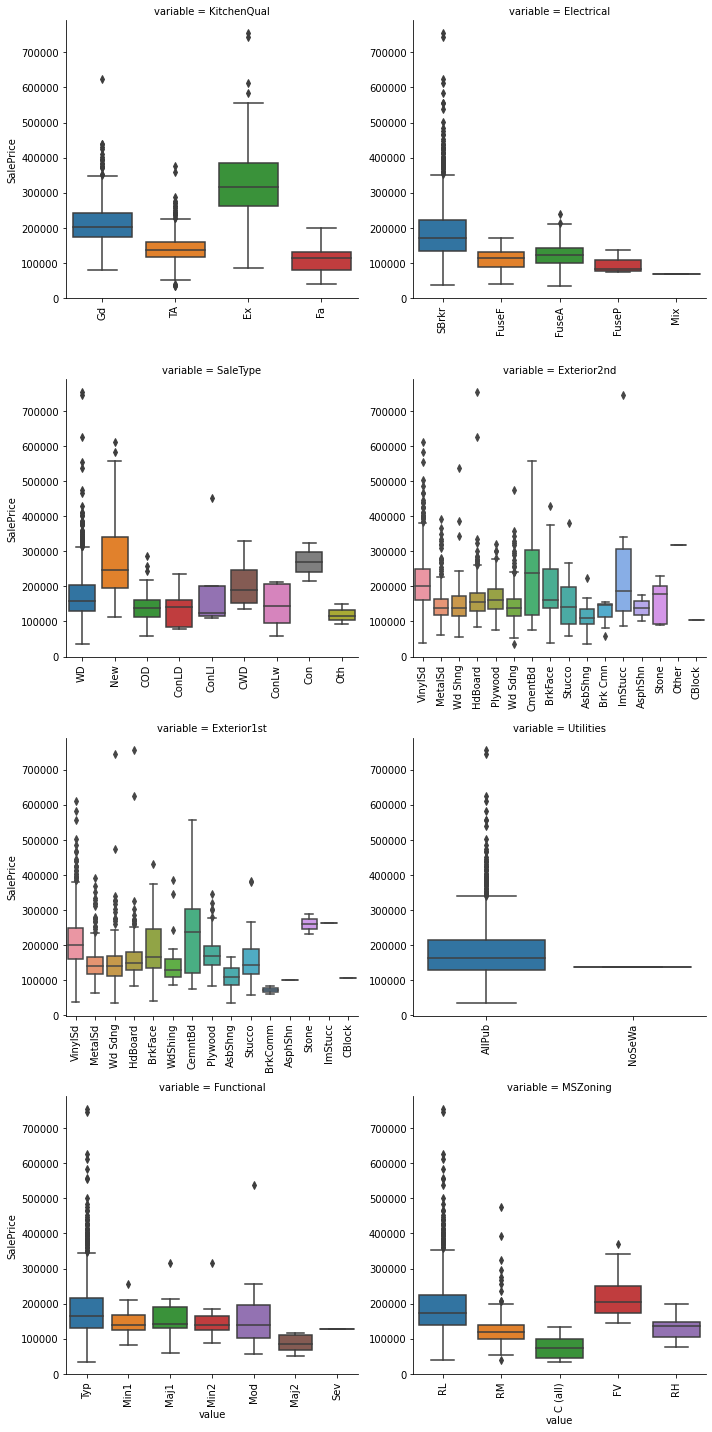

In [ ]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=[x for x in missing.index if x in all_data.select_dtypes("object").columns])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [ ]:
all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].median(), inplace=True)
all_data['GarageArea'].fillna(all_data['GarageArea'].mean(), inplace=True)
all_data['GarageCars'].fillna(all_data['GarageCars'].mean(), inplace=True)
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0], inplace=True)
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0], inplace=True)
all_data['BsmtUnfSF'].fillna(all_data['BsmtUnfSF'].median(), inplace=True)
all_data['BsmtFinSF2'].fillna(all_data['BsmtFinSF2'].median(), inplace=True)
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0], inplace=True)
all_data['Exterior1st'].fillna(all_data['Exterior1st'].value_counts().index[0], inplace=True)
all_data['Exterior2nd'].fillna(value=all_data['Exterior2nd'].value_counts().index[0], inplace=True)
all_data['BsmtFinSF1'].fillna(value=all_data['BsmtFinSF1'].median(), inplace=True)
all_data['BsmtFullBath'].fillna(all_data['BsmtFullBath'].mean(), inplace=True)
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0], inplace=True)
all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].median(), inplace=True)
all_data['MasVnrType'].fillna(all_data['MasVnrType'].mode()[0], inplace=True)
all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].value_counts().index[0], inplace=True)
all_data['LotFrontage'].fillna(all_data['LotFrontage'].median(), inplace=True)
all_data['Utilities'].fillna(all_data['Utilities'].mode()[0], inplace=True)
all_data['BsmtFullBath'].fillna(all_data['BsmtFullBath'].mode()[0], inplace=True)
all_data['BsmtHalfBath'].fillna(all_data['BsmtHalfBath'].mode()[0], inplace=True)
all_data['Functional'].fillna(all_data['Functional'].mode()[0], inplace=True)

In [ ]:
print("There are {} column have nulls ".format(all_data.isnull().sum().sum()))
train_eda=all_data[:len(train)]

There are 0 column have nulls 


### See SalePrice to see if it's normally distributed 3.2

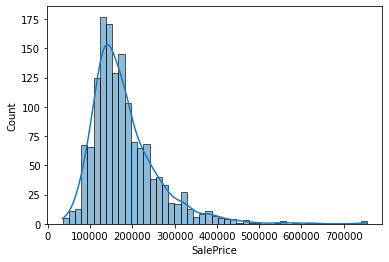

In [ ]:
sns.histplot(train['SalePrice'],kde=True)

it seems it's right skewed, so we better use log scaler

In [ ]:
train['SalePrice']=np.log1p(train['SalePrice'])

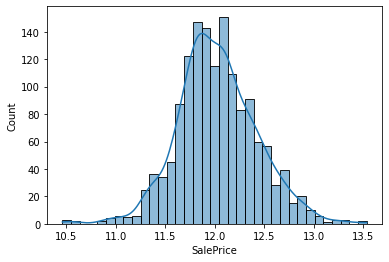

In [ ]:
sns.histplot(train['SalePrice'],kde=True)

That's better, it's now normal

### Ordinal Encoder 3.3 

In [ ]:
cleanup_nums={}
cleanup_nums['ExterQual']={"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "MISSING":0}
cleanup_nums['GarageCond']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "MISSING":0}
cleanup_nums['GarageQual']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "MISSING":0}
cleanup_nums['GarageFinish']= {"Fin": 3, "RFn": 2, "Unf":1, "MISSING":0}
cleanup_nums['BsmtQual']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "MISSING":0}
cleanup_nums['BsmtCond']= {"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "MISSING":0}
cleanup_nums['BsmtExposure']= {"Gd": 4, "Av": 3, "Mn":2, "No":1, "MISSING":0}
cleanup_nums['BsmtFinType1']= {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "MISSING":0}
cleanup_nums['BsmtFinType2']= {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "MISSING":0}
cleanup_nums['HeatingQC']={"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "MISSING":0}
cleanup_nums['KitchenQual']={"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "MISSING":0}
cleanup_nums['FireplaceQu']={"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "MISSING":0}
cleanup_nums['PoolQC']={"Ex": 5, "Gd": 4, "TA":3, "Fa":2, "Po":1, "MISSING":0}
cleanup_nums['Fence']={"GdPrv": 5, "MnPrv": 4, "GdWo":3, "MnWw":2, "Po":1, "MISSING":0}

all_data=all_data.replace(cleanup_nums)



In [ ]:
all_data.shape

(2919, 80)

### 3.4 Scalling

In [ ]:
quan=train.select_dtypes("int").columns.difference(["Id"])
for c in quan:
  sc=StandardScaler()
  all_data[c]=sc.fit_transform(all_data[[c]])


In [ ]:
all_data.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1411,2872,-0.638379,RL,60.0,-0.263785,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,-2.900656,-2.304326,-1.628223,-1.400833,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,TA,BrkTil,3,3,1,1,-0.969133,1,-0.293025,-0.142787,-1.256775,GasA,3,N,FuseF,-1.68644,-0.785025,-0.101197,-1.981878,-0.819679,-0.249719,-1.027363,-0.756321,-2.26153,-0.207698,3,-2.19967,Typ,-0.924311,0,Detchd,1922.0,1,-1.006906,-1.192984,2,2,N,-0.74076,-0.702843,1.197226,-0.103331,-0.285935,-0.06315,0,0,MISSING,-0.089592,-1.552184,-1.363569,ConLD,Normal


### 3.5 Creating new columns

In [ ]:
all_data['hasPool']=all_data['PoolQC'].apply(lambda x: 1 if x >0 else 0)
all_data['hasGarage']=all_data['GarageQual'].apply(lambda x: 1 if x >0 else 0)
all_data['has2ndFlr']=all_data['2ndFlrSF'].apply(lambda x: 1 if x >0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0) 
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
all_data['builtInLast50Yrs']= all_data['YearBuilt'].apply(lambda x: 1 if x >= max(all_data['YearBuilt'])-50 else 0)
all_data['builtBefore50Yrs']= all_data['YearBuilt'].apply(lambda x: 1 if x < max(all_data['YearBuilt'])-50 else 0)
all_data['TotalArea']=all_data['1stFlrSF']+all_data['2ndFlrSF']+all_data['TotalBsmtSF']

In [ ]:
all_data.shape

(2919, 88)

In [ ]:
all_data_OHE=pd.get_dummies(all_data)
X_train=all_data_OHE[:len(train)]
X_test=all_data_OHE[len(train):]
y_train=train['SalePrice']
all_data_OHE.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_MISSING,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.067331,65.0,-0.217879,0.646183,-0.507284,1.046258,0.896833,196.0,4,4,3,1,6,0.580959,1,-0.293025,-0.934782,-0.444278,5,-0.773861,1.207379,-0.101197,0.413547,1.087023,-0.249719,0.781366,1.232599,0.169927,-0.207698,4,0.986849,-0.924311,0,2003.0,2,0.306528,0.348900,3,3,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,-0.873616,80.0,-0.072044,-0.063185,2.188279,0.154764,-0.395604,0.0,3,4,3,4,5,1.178162,1,-0.293025,-0.629818,0.477158,5,0.261075,-0.785025,-0.101197,-0.471891,-0.819679,3.822508,0.781366,-0.756321,0.169927,-0.207698,3,-0.287758,0.623632,3,1976.0,2,0.306528,-0.059792,3,3,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,0.067331,68.0,0.137197,0.646183,-0.507284,0.980221,0.848965,162.0,4,4,3,2,6,0.097928,1,-0.293025,-0.288441,-0.299027,5,-0.610718,1.235375,-0.101197,0.563755,1.087023,-0.249719,0.781366,1.232599,0.169927,-0.207698,4,-0.287758,0.623632,3,2001.0,2,0.306528,0.627553,3,3,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,0.302568,60.0,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,0.0,3,3,4,1,5,-0.494884,1,-0.293025,-0.047201,-0.671232,4,-0.506205,0.978742,-0.101197,0.427382,1.087023,-0.249719,-1.027363,-0.756321,0.169927,-0.207698,4,0.349546,0.623632,4,1998.0,1,1.619961,0.785457,3,3,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,0.067331,84.0,0.518903,1.355551,-0.507284,0.947203,0.753229,350.0,4,4,3,3,6,0.468984,1,-0.293025,-0.160994,0.211621,5,-0.037170,1.671651,-0.101197,1.378042,1.087023,-0.249719,0.781366,1.232599,1.385655,-0.207698,4,1.624153,0.623632,3,2000.0,2,1.619961,1.686437,3,3,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
X_train.shape, y_train.shape, X_test.shape, all_data_OHE.shape

((1460, 253), (1460,), (1459, 253), (2919, 253))

In [ ]:
all_data_OHE.sample()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_MISSING,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_MISSING,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
79,80,-0.167905,60.0,0.034479,-0.772552,0.391237,-2.024443,-0.156264,0.0,3,3,3,1,1,-0.969133,1,-0.293025,-0.274786,-1.388409,4,-1.217405,0.493473,-0.101197,-0.535136,-0.819679,-0.249719,-1.027363,1.232599,-1.045801,-0.207698,3,-0.925062,-0.924311,0,1966.0,1,0.306528,-0.152677,3,3,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
all_data_OHE.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

In [ ]:
train_OHE=X_train.copy()
train_OHE.drop(['Id'], inplace=True, axis=1)
train_OHE['SalePrice']=y_train
train_OHE['SalePrice']=train['SalePrice']
train_OHE.corr()['SalePrice'].sort_values(ascending=False)[:20]

SalePrice           1.000000
OverallQual         0.817185
TotalArea           0.776455
GrLivArea           0.700927
GarageCars          0.680625
ExterQual           0.678840
KitchenQual         0.667893
GarageArea          0.650888
BsmtQual            0.615804
TotalBsmtSF         0.612134
GarageFinish        0.604878
1stFlrSF            0.596981
FullBath            0.594771
YearBuilt           0.586570
YearRemodAdd        0.565608
FireplaceQu         0.546362
TotRmsAbvGrd        0.534422
Foundation_PConc    0.530840
hasbsmt             0.521556
hasfireplace        0.510026
Name: SalePrice, dtype: float64

In [ ]:
train_OHE.corr()['SalePrice'].sort_values(ascending=False)[-10:]

PavedDrive_N         -0.286343
LotShape_Reg         -0.289635
GarageType_MISSING   -0.322998
Foundation_CBlock    -0.337815
MSZoning_RM          -0.347446
CentralAir_N         -0.351599
GarageType_Detchd    -0.388638
MasVnrType_None      -0.395389
builtInLast50Yrs           NaN
builtBefore50Yrs           NaN
Name: SalePrice, dtype: float64

### 3.6 Removing redundant columns

By dendogram 

In [ ]:
all_cols=train_OHE.columns
for c in all_cols:
  train_OHE[c]=train_OHE[c].astype("float")

In [ ]:
all_data[train.select_dtypes(np.number).columns.difference(['SalePrice'])]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.773861,1.207379,-0.103331,0.169927,0.580959,-0.293025,1.087023,-0.249719,-0.934782,-0.359601,-0.924311,0.781366,0.348900,0.306528,2003.0,0.413547,1.232599,1,-0.207698,-0.217879,65.0,-0.101197,0.067331,196.0,-0.089592,-1.552184,0.200006,-0.507284,0.646183,-0.06315,-0.285935,0.986849,-0.444278,-0.740760,1.046258,0.896833,0.157646
1,0.261075,-0.785025,-0.103331,0.169927,1.178162,-0.293025,-0.819679,3.822508,-0.629818,-0.359601,0.623632,0.781366,-0.059792,0.306528,1976.0,-0.471891,-0.756321,2,-0.207698,-0.072044,80.0,-0.101197,-0.873616,0.0,-0.089592,-0.446925,-0.702843,2.188279,-0.063185,-0.06315,-0.285935,-0.287758,0.477158,1.614879,0.154764,-0.395604,-0.602962
2,-0.610718,1.235375,-0.103331,0.169927,0.097928,-0.293025,1.087023,-0.249719,-0.288441,-0.359601,0.623632,0.781366,0.627553,0.306528,2001.0,0.563755,1.232599,3,-0.207698,0.137197,68.0,-0.101197,0.067331,162.0,-0.089592,1.026753,-0.081209,-0.507284,0.646183,-0.06315,-0.285935,-0.287758,-0.299027,-0.740760,0.980221,0.848965,0.157646
3,-0.506205,0.978742,-0.103331,0.169927,-0.494884,-0.293025,1.087023,-0.249719,-0.047201,3.874967,0.623632,-1.027363,0.785457,1.619961,1998.0,0.427382,-0.756321,4,-0.207698,-0.078385,60.0,-0.101197,0.302568,0.0,-0.089592,-1.552184,-0.184815,-0.507284,0.646183,-0.06315,-0.285935,0.349546,-0.671232,-0.740760,-1.859351,-0.682812,-1.363569
4,-0.037170,1.671651,-0.103331,1.385655,0.468984,-0.293025,1.087023,-0.249719,-0.160994,-0.359601,0.623632,0.781366,1.686437,1.619961,2000.0,1.378042,1.232599,5,-0.207698,0.518903,84.0,-0.101197,0.067331,350.0,-0.089592,2.132012,0.540424,-0.507284,1.355551,-0.06315,-0.285935,1.624153,0.211621,0.776967,0.947203,0.753229,0.157646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.564083,0.488807,-0.103331,0.169927,-0.969133,-0.293025,-0.819679,-0.249719,-0.033546,-0.359601,-0.924311,-1.027363,-2.196138,-2.320339,2005.0,-0.807883,1.232599,2915,-0.207698,-1.043937,21.0,-0.101197,2.419700,0.0,-0.089592,-0.078505,-0.702843,1.289758,-1.481920,-0.06315,-0.285935,-0.925062,-1.147837,-0.740760,-0.043346,-0.682812,-1.363569
1455,-1.564083,0.488807,-0.103331,0.169927,-0.415842,-0.293025,-0.819679,-0.249719,-0.607060,-0.359601,-0.924311,-1.027363,-0.867888,-1.006906,1970.0,-0.807883,1.232599,2916,-0.207698,-1.049263,21.0,-0.101197,2.419700,0.0,-0.089592,-0.815344,-0.347624,-0.507284,-1.481920,-0.06315,-0.285935,-0.287758,-1.147837,-0.740760,-0.043346,-0.682812,-1.363569
1456,0.164209,-0.785025,-0.103331,1.385655,1.718279,-0.293025,1.087023,-0.249719,-1.276159,-0.359601,0.623632,-1.027363,0.478938,0.306528,1960.0,-0.546995,-0.756321,2917,-0.207698,1.246808,160.0,-0.101197,-0.873616,0.0,-0.089592,1.026753,-0.702843,1.289758,-0.772552,-0.06315,-0.285935,0.349546,0.390915,3.006130,-0.373528,0.561757,-1.363569
1457,-0.483263,-0.785025,-0.103331,0.169927,-0.229217,-0.293025,-0.819679,3.822508,0.032454,-0.359601,-0.924311,-1.027363,-2.196138,-2.320339,2005.0,-1.049006,-0.756321,2918,-0.207698,0.034605,62.0,-0.101197,0.655424,0.0,1.144312,0.289914,-0.229217,-0.507284,-0.772552,-0.06315,-0.285935,-0.287758,-0.317183,-0.108374,0.683057,0.370284,-1.363569


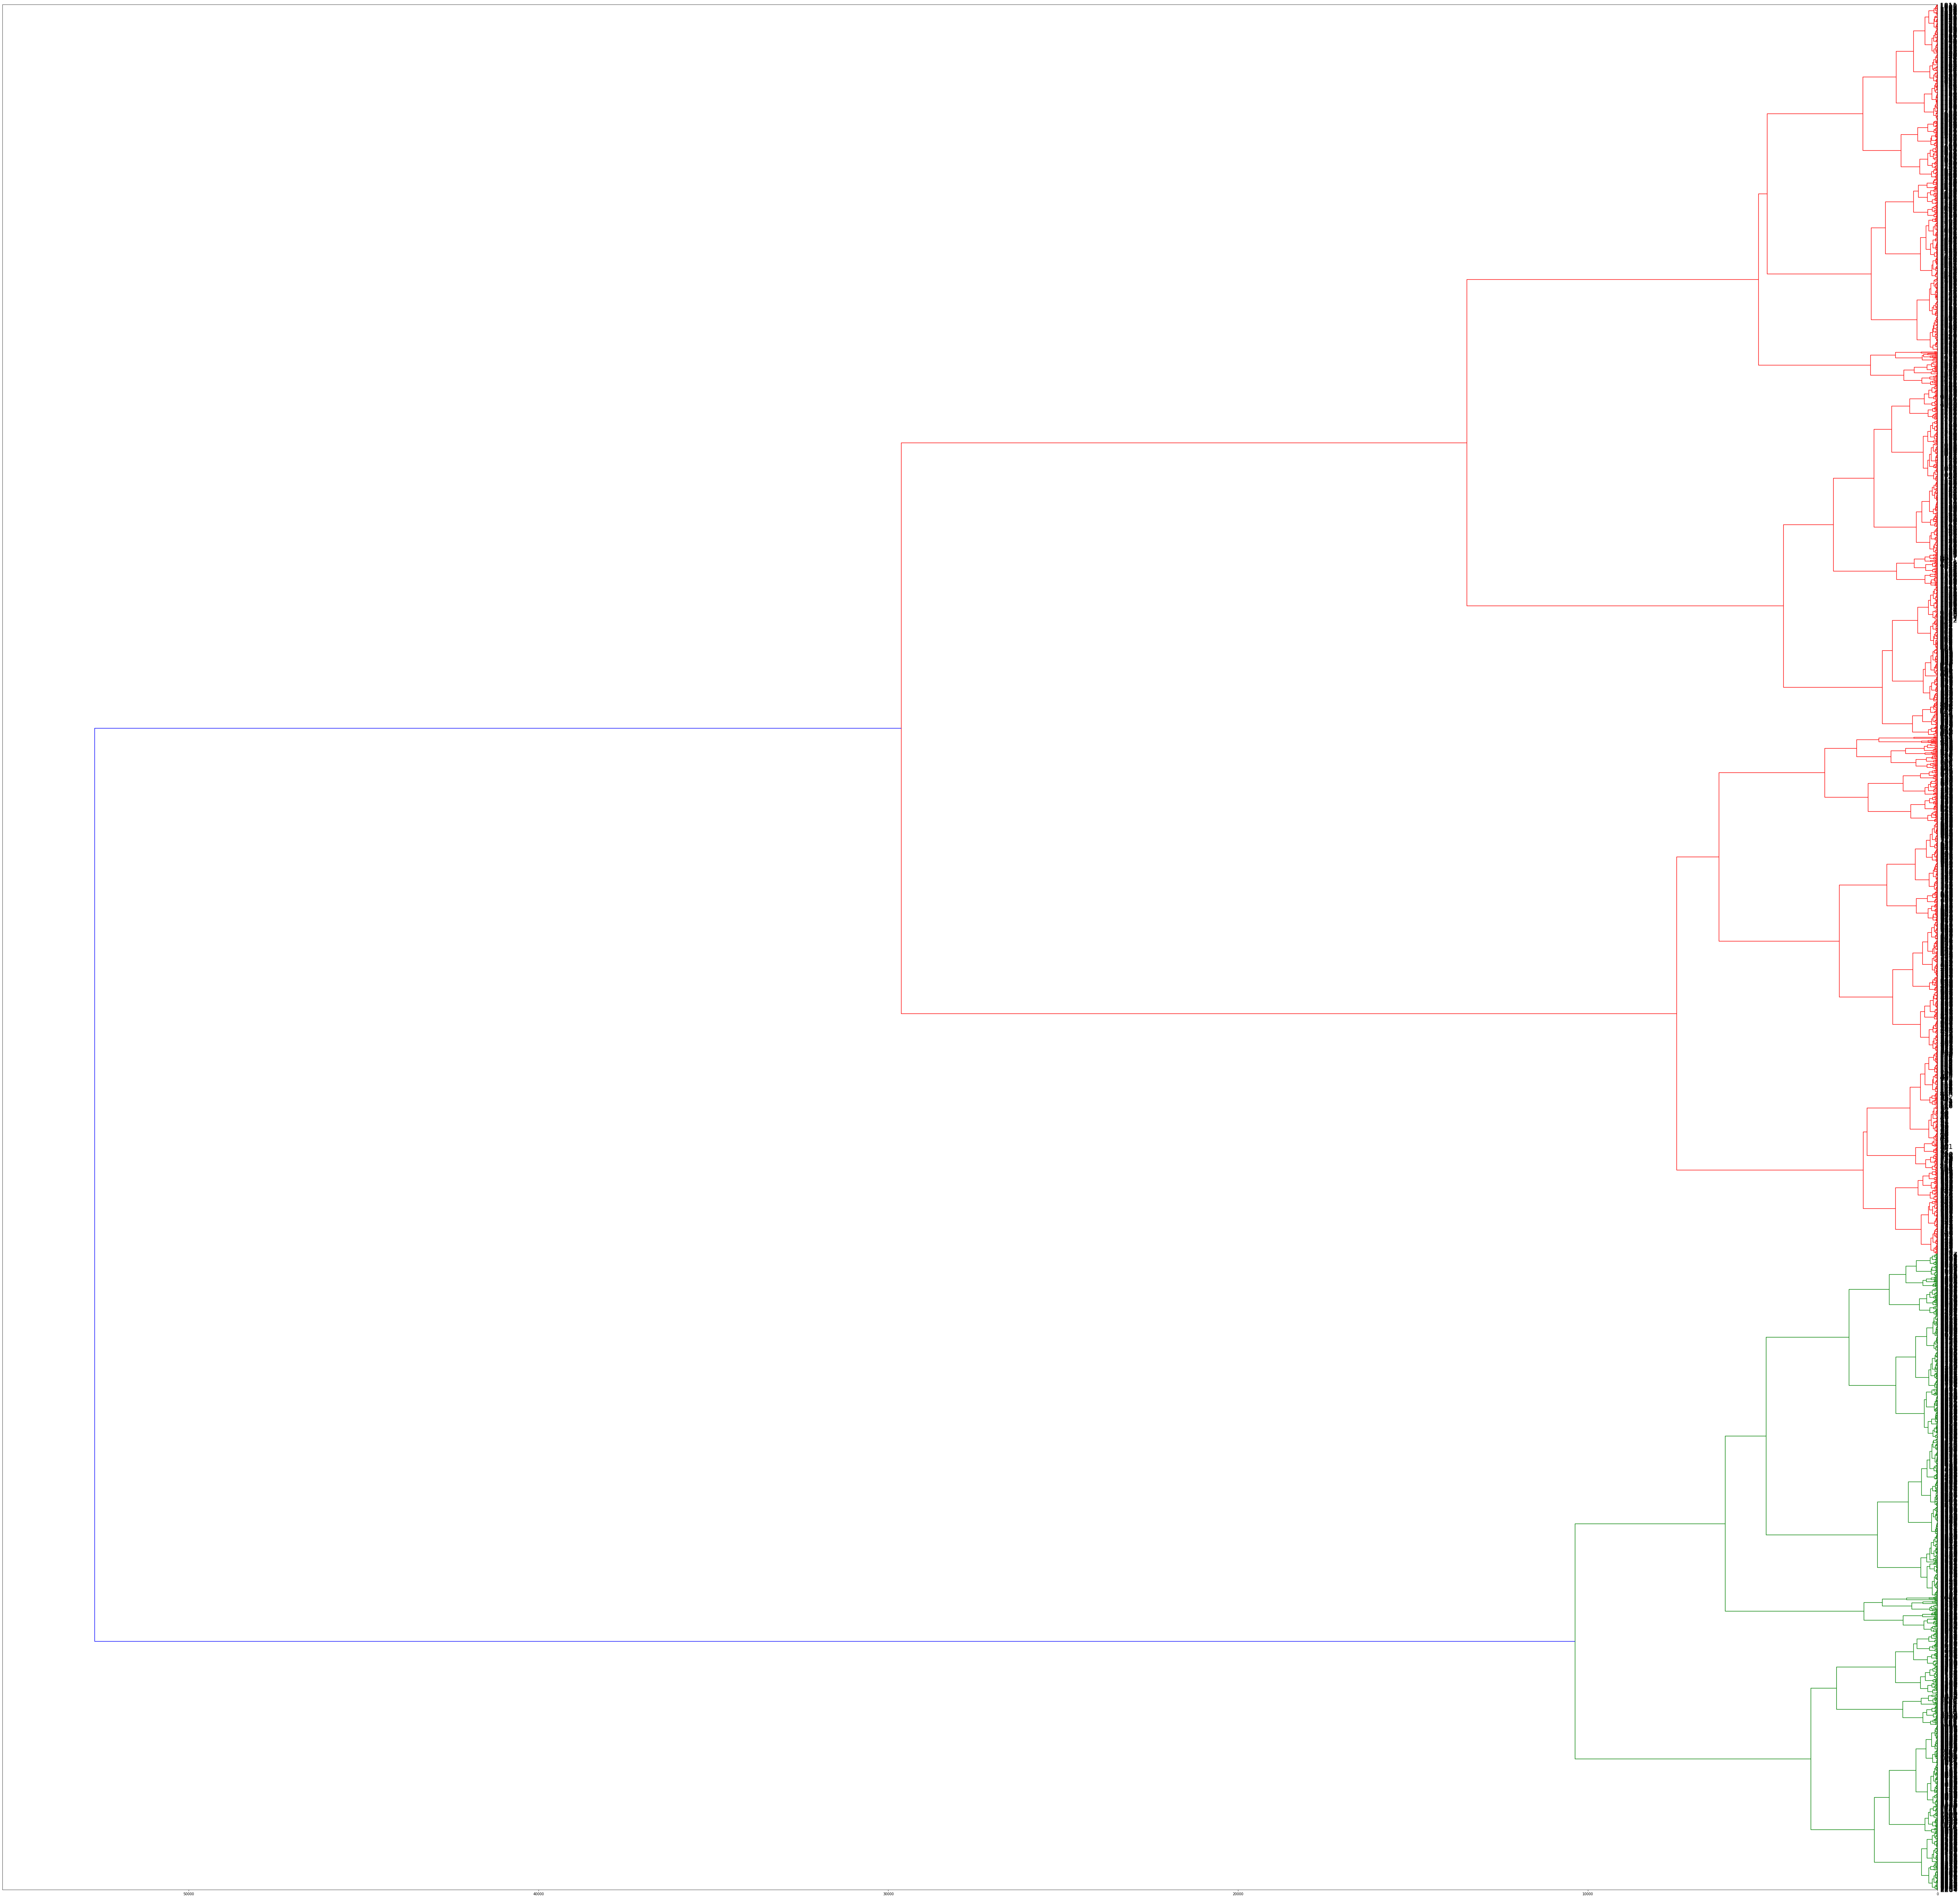

<Figure size 432x288 with 0 Axes>

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(100,100))
den=dendrogram(sch.linkage(all_data[train.select_dtypes(np.number).columns.difference(['SalePrice'])], method='ward'),orientation='left',leaf_font_size=20)
plt.show()
plt.savefig('plt1.png', dpi=320, format='png', bbox_inches='tight')

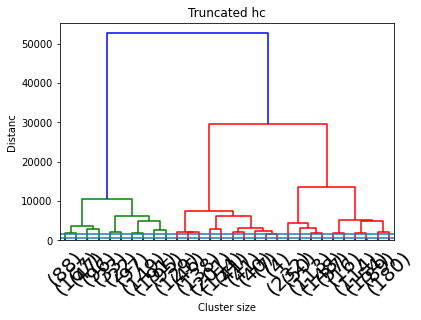

In [ ]:
quan_cols=train.select_dtypes(np.number).columns.difference(['SalePrice'])
Z=sch.linkage(all_data[quan_cols], method='ward')
dendrogram(Z,truncate_mode='lastp',leaf_rotation=45., leaf_font_size=20.,show_contracted=True,labels=quan_cols)
plt.title("Truncated hc")
plt.xlabel("Cluster size")
plt.ylabel("Distanc")
plt.axhline(y=500)
plt.axhline(y=1500)
plt.show()

### 3.7 PCA

In [ ]:
pca_com=50
pca=PCA(n_components=len(train_OHE.columns))
X=pca.fit_transform(train_OHE)

In [ ]:
explained_variance=pca.explained_variance_ratio_

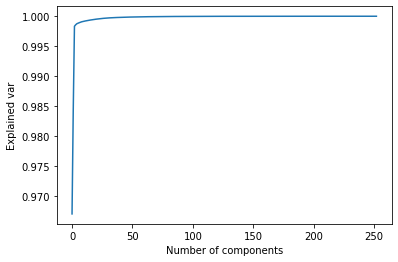

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel("Explained var")
plt.show()

In [ ]:
Var_matrix =(pd.concat([pd.DataFrame(list(all_data_OHE.columns), columns=["Factors"] ) ,pd.DataFrame(list(explained_variance**2), columns=["^2 Variance"] )] , axis=1).sort_values(by='^2 Variance', ascending = False)[0:pca_com])

list(Var_matrix['Factors']) 
X_new = all_data_OHE[list(Var_matrix['Factors'])]

X_new.dtypes

Id                 int64
MSSubClass       float64
LotFrontage      float64
LotArea          float64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
MasVnrArea       float64
ExterQual          int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1       float64
BsmtFinType2       int64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
HeatingQC          int64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath         float64
HalfBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
KitchenQual        int64
TotRmsAbvGrd     float64
Fireplaces       float64
FireplaceQu        int64
GarageYrBlt      float64
GarageFinish       int64
GarageCars       float64
GarageArea       float64
GarageQual         int64
GarageCond         int64


In [ ]:
X_new_train=X_new[:len(train)]
X_new_test=X_new[len(train):]
X_new_train['Id']=train['Id'].tolist()
X_new_train.shape, X_new_test.shape

#X_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



((1460, 50), (1459, 50))

In [ ]:

X_new.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold'],
      dtype='object')

# Ridge Regression

In [ ]:
parameters = {'alpha':np.arange(0.1,3,0.1), 'l1_ratio':np.arange(0.1,3,0.1),'fit_intercept':[True,False]}
lin_reg = ElasticNet()
clf = GridSearchCV(lin_reg, parameters)
clf.fit(X_new_train.values, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5510 fits failed out of a total of 8410.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
290 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 926, in fit
    f"l1_ratio must be between 0 and 1; got l1_ratio={self.l1_ratio}"
ValueError: l1_ratio must be between 0 and 1; got l1_ratio=1.1

--------------------------------------------------------------------

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9]),
                         'fit_intercept': [True, False],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])})

In [ ]:
clf.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.1}

In [ ]:
print('Best Acc = ', clf.best_score_*100)

Best Acc =  84.7635835883888


In [ ]:
y_pred = clf.best_estimator_.predict(X_new_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but ElasticNet was fitted without feature names



In [ ]:
y_pred

array([11.66856986, 11.88100659, 12.08285002, ..., 12.04039527,
       11.64178542, 12.31352717])

In [ ]:
y_pred=np.expm1(y_pred)

In [ ]:
y_pred

array([116840.06417562, 144494.92555157, 176812.36442133, ...,
       169462.91073929, 113752.08053276, 222687.04609299])

In [ ]:
output=pd.DataFrame({"Id":test.Id, 'SalePrice':y_pred})

In [ ]:
output.to_csv("Submission-1.csv",index=False)

YEAH!! I get 0.15% error on Kaggle

# 4.1 Second model with pca compents just 20

Just for try

In [ ]:
pca_com_2=20
pca_2=PCA(n_components=len(train_OHE.columns))
X_2=pca_2.fit_transform(train_OHE)

explained_variance_2=pca_2.explained_variance_ratio_

Var_matrix_2 =(pd.concat([pd.DataFrame(list(all_data_OHE.columns), columns=["Factors"] ) ,pd.DataFrame(list(explained_variance_2**2), columns=["^2 Variance"] )] , axis=1).sort_values(by='^2 Variance', ascending = False)[0:pca_com_2])

list(Var_matrix_2['Factors']) 
X_new_2 = all_data_OHE[list(Var_matrix['Factors'])]

X_new_2.dtypes

Id                 int64
MSSubClass       float64
LotFrontage      float64
LotArea          float64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
MasVnrArea       float64
ExterQual          int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1       float64
BsmtFinType2       int64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
HeatingQC          int64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath         float64
HalfBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
KitchenQual        int64
TotRmsAbvGrd     float64
Fireplaces       float64
FireplaceQu        int64
GarageYrBlt      float64
GarageFinish       int64
GarageCars       float64
GarageArea       float64
GarageQual         int64
GarageCond         int64


In [ ]:
X_new_train_2=X_new[:len(train)]
X_new_test_2=X_new[len(train):]
X_new_train_2['Id']=train['Id'].tolist()

parameters_2 = {'alpha':np.arange(0.1,3,0.1), 'l1_ratio':np.arange(0.1,3,0.1),'fit_intercept':[True,False]}
lin_reg_2 = ElasticNet()
clf_2 = GridSearchCV(lin_reg_2, parameters_2)
clf_2.fit(X_new_train_2.values, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5510 fits failed out of a total of 8410.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
290 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    esti

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9]),
                         'fit_intercept': [True, False],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])})

In [ ]:
print(clf_2.best_params_)
print('Best Acc = ', clf_2.best_score_*100)
y_pred_2 = clf_2.best_estimator_.predict(X_new_test) 
y_pred_2=np.expm1(y_pred_2)
output_2=pd.DataFrame({"Id":test.Id, 'SalePrice':y_pred_2})
output_2.to_csv("Submission-2.csv",index=False)

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.1}
Best Acc =  84.7635835883888


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but ElasticNet was fitted without feature names



 NO DIFFERENCE ACTAULLY, I WASN'T HOPING SO, JUST TRYING 

Now that we have modeled our data AND got some good score, lets do some EDA

# 5.0 EDA

#### Questions
1- For MSZonning, which type have highest price?

2- what kind of street is more associated with MSZonning?

3- Average LotArea?

4- what kind of Alley is more associated with MSZonning?

5- what kind of Lotshape is more associated with MSZonning?

6- do most of houses have most of utilities

7- what about overallQual, and OversllCond

8- what is the most year having many houses built?

9- do old houses have low external quality?

10- what is the most famous foundation in old and in new houses?

11- which have more centralAir? new or old?

12- average feet in First floor, and second floor in old and new houses?



In [ ]:
train_eda['SalePrice']=train['SalePrice']
train_eda.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,MISSING,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,MISSING,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,MISSING,MISSING,MISSING,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,MISSING,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,MISSING,MISSING,MISSING,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,MISSING,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,MISSING,MISSING,MISSING,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,MISSING,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,MISSING,MISSING,MISSING,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,MISSING,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,MISSING,MISSING,MISSING,0,12,2008,WD,Normal,12.429220


### 5.1 For MSZonning, which type have highest price?

In [ ]:
t1=train_eda.groupby('MSZoning').mean()[['SalePrice']]
t1['MSZoning']=t1.index
t1.index=np.arange(0,len(t1))
px.bar(t1,'MSZoning','SalePrice',title="Sale price with respect to MSZoning")

Here we see the FV(Floating Village Residential) has highest average priced, followed by RL (Residential Low DensityResidential Low Density: "Low density residential zones" are locations intended for housing that include a lot of open space. )

Lowest price is in C commercial

Link for FV: http://www.bfsa.eu/images/products/residential-structures/village/floating_village_1.jpg

Link for RL: https://webassets.inman.com/wp-content/uploads/2018/02/Untitled-design-10-1024x454.png


### 5.2 what kind of street is more associated with MSZonning?

In [ ]:
train_eda.query("MSZoning =='FV'").Street.value_counts()

Pave    65
Name: Street, dtype: int64

Seems like in good place, no chance for the street to be not paved

In [ ]:
train_eda.query("MSZoning =='RL'").Street.value_counts()

Pave    1148
Grvl       3
Name: Street, dtype: int64

but in low residential areas, the chance of beign be not paved exist, but still very small, $\frac{3}{3+1148}*100 = 0.2$

### 5.3 Average LotArea?

In [ ]:
print("Average Lot Area in all conditions is {} squared feet which is equal to {} meters squared".format(train_eda.LotArea.mean(),train_eda.LotArea.mean()*0.092903))

Average Lot Area in all conditions is 10516.828082191782 squared feet which is equal to 977.0448793198631 meters squared


In [ ]:
t3=train_eda.groupby('MSZoning').mean()['LotArea'].sort_values(ascending=True)
px.bar(t3,x=t3.index , y='LotArea',labels={'x':'MSZoning'}, title="Lot area with repect to different MSZOning")

As expected, Low residential denisty has higest average LotArea, and Floating villages has small average, 

### 5.4 what kind of Alley is more associated with MSZonning?

In [ ]:
t4=train_eda.query("Alley =='Grvl'").groupby('MSZoning').count()
px.bar(t4, x=t4.index,y='Alley',title="number of houses having Grvl with respect to MSZoning, if MSZoning doesn't exist, then it equals to zero " ,labels={'x':"MZoning"})

In [ ]:
t4_1=train_eda.query("Alley =='Pave'").groupby('MSZoning').count()
px.bar(t4_1, x=t4_1.index,y='Alley',title="number of houses having Paved with respect to MSZoning, if MSZoning doesn't exist, then it equals to zero " ,labels={'x':"MZoning"})

Here we see the FV have number of paved allyes, lowest is due to RH (Residential High Density)

### 5.5 what kind of Lotshape is more associated with MSZonning?

In [ ]:
def plt_wrt_mzn(var,val):
  t=train_eda.query("{} =='{}'".format(var,val)).groupby('MSZoning').count()
  return px.bar(t, x=t.index,y=var,title="number of houses having {} with respect to MSZoning, if MSZoning doesn't exist, then it equals to zero ".format(val) ,labels={'x':"MZoning"})

In [ ]:
plt_wrt_mzn('LotShape','Reg')

Most regular lots are in RL (Residential Low Density)

### 5.6 do most of houses have most of utilities

In [ ]:
train_eda.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

It seems all houses have all basic utilites, electricity, gas, water, and septic tank

### 5.7  what about overallQual, and OversllCond

In [ ]:
train_eda.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [ ]:
t7=pd.DataFrame(train_eda.groupby('OverallQual')['SalePrice'].mean()).sort_values(by='SalePrice',ascending=True)
px.bar(t7,x=t7.index , y='SalePrice',labels={'x':'Overall Qual'}, title="SalePrice wrt to overall qual")

a linear relation is quite clear here


In [ ]:
px.scatter(train_eda,x='OverallQual' , y='SalePrice', title="SalePrice wrt to overall qual")

but still there are quite variations in saleprice for houses having the same overallQual, for example in 10, there are too many outliers, having less than 200k price, while the average is in 450k

### 5.8  what is the most year having many houses built?

In [ ]:
print("Most year having lots of houses buits is in {}, and in that year, a {} houses was built ".format(train_eda.groupby('YearBuilt').count()['SalePrice'].idxmax(),train_eda.groupby('YearBuilt').count()['SalePrice'].max() ))
, 

Most year having lots of houses buits is in 2006, and in that year, a 67 houses was built 


''

 ### 5.9 do old houses have low external quality?

In [ ]:
midYear=train_eda.YearBuilt.median()
midYear

1973.0

In [ ]:
t8=train_eda.copy()
t8['isNew']=t8['YearBuilt'].apply(lambda x: 1 if x> midYear else 0)

In [ ]:
t8_1=t8.groupby("isNew")['SalePrice'].mean()
px.bar(t8_1,x=t8_1.index, y='SalePrice',labels={'x':"Is New?"})

we see that newer houses have higher prices by large difference, nearly equal to $250k-125k=75k$

In [ ]:
t8['haveHighQual']=t8['OverallQual'].apply(lambda x: 1 if x>=5 else 0)
t8_2=t8.groupby("isNew")['haveHighQual'].sum()
px.bar(t8_2,x=t8_2.index, y='haveHighQual',labels={'x':"Is New?"})

Actully they have quite close numver of highqual in both new and old, i think it thy are corelated 

### 5.10 what is the most famous foundation in old and in new houses?

In [ ]:
train_eda.query("YearBuilt >= {}".format(midYear))['Foundation'].value_counts()

PConc     568
CBlock    154
Slab        6
Wood        3
Name: Foundation, dtype: int64

in new houses they use more PConc (Poured Contrete) followed by CBlock (Cinder Block)

In [ ]:
train_eda.query("YearBuilt < {}".format(midYear))['Foundation'].value_counts()

CBlock    480
BrkTil    146
PConc      79
Slab       18
Stone       6
Name: Foundation, dtype: int64

in old houses, they used more CBlock also, followed by BrkTil(Brick & Tile)

### 5.11 which have more centralAir? new or old?
it's really importatn nowadays.

In [ ]:
train_eda.query("YearBuilt >= {}".format(midYear))['CentralAir'].value_counts()

Y    731
Name: CentralAir, dtype: int64

All new houses have central air

In [ ]:
train_eda.query("YearBuilt < {}".format(midYear))['CentralAir'].value_counts()

Y    634
N     95
Name: CentralAir, dtype: int64

but old houses some of them don't have central air, percetage is $\frac{95}{95+634}*100=13%$

### 5.12  average feet in First floor, and second floor in old and new houses?

In [ ]:
print("for new houses, avg first floor in squared feet is {}, and in old houses is {}".format(train_eda.query("YearBuilt >= {}".format(midYear))['1stFlrSF'].mean(), train_eda.query("YearBuilt < {}".format(midYear))['1stFlrSF'].mean()))

for new houses, avg first floor in squared feet is 1253.9247606019153, and in old houses is 1071.0781893004116


In [ ]:
print("for new houses, avg second floor in squared feet is {}, and in old houses is {}".format(train_eda.query("YearBuilt >= {}".format(midYear))['2ndFlrSF'].mean(), train_eda.query("YearBuilt < {}".format(midYear))['2ndFlrSF'].mean()))

for new houses, avg second floor in squared feet is 416.63201094391246, and in old houses is 277.161865569273


in second floow the difference is big, in new houses have double the size of second floow size in old houses

# 6.0 Conclusion



1.   Here we see the FV(Floating Village Residential) has highest average priced, followed by RL (Residential Low DensityResidential Low Density: "Low density residential zones" are locations intended for housing that include a lot of open space. )

2.   Average Lot Area in all conditions is 10516.828082191782 squared feet which is equal to 977.0448793198631 meters squared

3. Low residential denisty has higest average LotArea, and Floating villages has small average,

4. Here we see the FV have number of paved allyes, lowest is due to RH (Residential High Density)

5. Most regular lots are in RL (Residential Low Density)

6. linera relationshop exist between overqual and saleprice, but still some having high overall quality, have low price, we treated them as outliers.

7. newer houses have higher prices by large difference, nearly equal to  250k−125k=75k

8. Actully they have quite close numver of highqual in both new and old, i think it thy are corelated

9. Most year having lots of houses buits is in 2006, and in that year, a 67 houses was built 

10. in second floow the difference is big, in new houses have double the size of second floow size in old houses

11. for new houses, avg second floor in squared feet is 416.63201094391246, and in old houses is 277.161865569273

Limitation 🤚
The dataset is so small, about only 1500 samples, they are not large enough to build a hypothese based on it, however, most of outcomes are like what i expected, no wierd relation existed




